<a href="https://colab.research.google.com/github/mohammadAliMkh/Pytorch/blob/main/multiClassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [247]:
import requests
import os

r = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

if os.path.exists("/content/helper_functions.py"):
  print("File Aleady Exists")
else:
  open("helper_functions.py" , 'wb').write(r.content)

File Aleady Exists


In [248]:
from helper_functions import plot_decision_boundary , accuracy_fn

In [273]:
# making blobs
x , y = make_blobs(n_samples = 2000 , centers = 4 , n_features = 2 , cluster_std =0.99)

In [271]:
# turning data and labels to tensor arrays
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

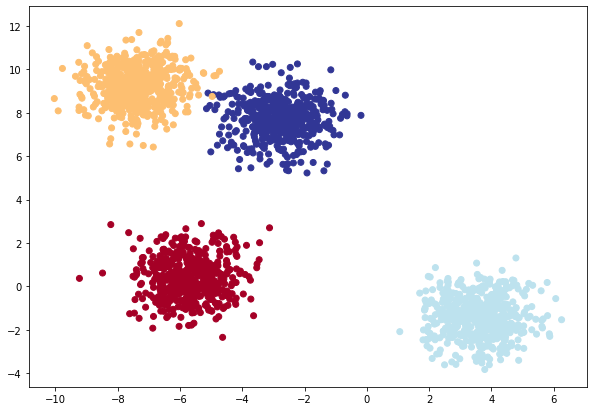

In [272]:
#ploting our data
plt.figure(figsize = (10 , 7))
plt.scatter(x[:, 0] , x[: , 1] , c= y , cmap = plt.cm.RdYlBu)

In [252]:
# make train and test splits
train_data , test_data , train_label ,  test_label = train_test_split(x , y , test_size = 0.2 , shuffle = True)

In [253]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [254]:
train_data = train_data.to(device)
train_label = train_label.to(device)
test_data = test_data.to(device)
test_label = test_label.to(device)

In [255]:
class MultiClassification(torch.nn.Module):
  def __init__(self, in_features = 2 , hidden_features = 10 , out_features = 4):
    super().__init__()
    self.layers = torch.nn.Sequential(
        torch.nn.Linear(in_features = in_features , out_features = hidden_features),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features = hidden_features , out_features = hidden_features),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features = hidden_features , out_features = out_features),
    )

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.layers(x)

In [256]:
model = MultiClassification()

In [257]:
model.to(device)

MultiClassification(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [258]:
#creating loop and initiate loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters() , lr = 0.01)

epochs = 500

for step in range(epochs):
  model.train()

  train_logits = model(train_data)
  train_preds = torch.argmax(torch.softmax(torch.squeeze(train_logits), dim = 1) , dim = 1)

  train_loss = loss_fn(train_logits , train_label)

  optimizer.zero_grad()

  train_loss.backward()

  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(test_data)
    test_preds = torch.argmax(torch.softmax(torch.squeeze(test_logits), dim = 1) , dim = 1)
    test_loss = loss_fn(test_logits , test_label)
  
  if step % 10 == 0:
    print(f"Step\t{step:3d} -> Train Loss {train_loss:0.2f} | Train Accuracy {accuracy_fn(train_label , train_preds):0.2f} | Test Loss {test_loss:0.2f} | Test Accuracy {accuracy_fn(test_label , test_preds):0.2f}")

Step	  0 -> Train Loss 1.52 | Train Accuracy 25.31 | Test Loss 1.56 | Test Accuracy 23.75
Step	 10 -> Train Loss 1.39 | Train Accuracy 25.25 | Test Loss 1.43 | Test Accuracy 24.00
Step	 20 -> Train Loss 1.33 | Train Accuracy 25.25 | Test Loss 1.37 | Test Accuracy 24.00
Step	 30 -> Train Loss 1.28 | Train Accuracy 25.25 | Test Loss 1.33 | Test Accuracy 24.00
Step	 40 -> Train Loss 1.25 | Train Accuracy 25.25 | Test Loss 1.28 | Test Accuracy 24.00
Step	 50 -> Train Loss 1.21 | Train Accuracy 25.37 | Test Loss 1.25 | Test Accuracy 24.25
Step	 60 -> Train Loss 1.18 | Train Accuracy 26.25 | Test Loss 1.21 | Test Accuracy 24.75
Step	 70 -> Train Loss 1.15 | Train Accuracy 26.88 | Test Loss 1.18 | Test Accuracy 25.25
Step	 80 -> Train Loss 1.12 | Train Accuracy 27.88 | Test Loss 1.15 | Test Accuracy 25.75
Step	 90 -> Train Loss 1.10 | Train Accuracy 29.31 | Test Loss 1.12 | Test Accuracy 26.75
Step	100 -> Train Loss 1.07 | Train Accuracy 30.94 | Test Loss 1.09 | Test Accuracy 28.25
Step	110 -

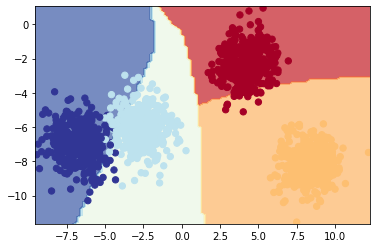

In [259]:
plot_decision_boundary(model , train_data , train_label)

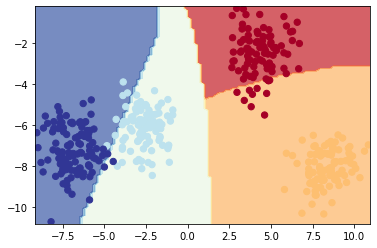

In [260]:
plot_decision_boundary(model , test_data , test_label)